In [ ]:
from lstm_dataset_class import LSTMTextClassificationDataset
import random
from torchtext.data.utils import get_tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

def visualize_dataset(dataset, num_samples=10):
    tokenizer = get_tokenizer("spacy", language="it_core_news_sm")
    
    fig, axes = plt.subplots(num_samples, 1, figsize=(20, 5*num_samples))
    fig.suptitle("Visualizing Processed Dataset Samples", fontsize=16)
    
    # Assuming 'unk_token_id' and 'pad_token_id' are the IDs for unk and pad tokens
    unk_token_id = dataset.vocab['<unk>']
    pad_token_id = dataset.vocab['<pad>']
    
    # Calculate token frequency for the entire dataset
    total_token_freq = Counter()
    for idx in range(len(dataset)):
        sample = dataset[idx]
        processed_ids = sample['input_ids'].tolist()
        filtered_ids = [id for id in processed_ids if id not in (unk_token_id, pad_token_id)]
        total_token_freq.update(filtered_ids)
    
    # Find the maximum frequency for normalization
    max_freq = max(total_token_freq.values())
    
    for i in range(num_samples):
        idx = random.randint(0, len(dataset) - 1)
        sample = dataset[idx]
        
        original_text = dataset.data[idx]['text']
        processed_ids = sample['input_ids'].tolist()
        label = dataset.data[idx]['choices'][sample['label'].item()]
        
        # Filter out unk and pad tokens
        filtered_ids = [id for id in processed_ids if id not in (unk_token_id, pad_token_id)]
        
        # Decode processed ids back to tokens
        processed_tokens = [dataset.vocab.get_itos()[id] for id in filtered_ids]
        
        # Get frequencies for this sample's tokens from the total dataset frequency
        freq_list = [total_token_freq[id] for id in filtered_ids]
        
        # Normalize frequencies
        normalized_freq_list = [freq / max_freq for freq in freq_list]
        
        # Visualize
        ax = axes[i]
        sns.heatmap([normalized_freq_list], ax=ax, cmap='YlOrRd', cbar=True, vmin=0, vmax=1)
        ax.set_yticks([])
        ax.set_xticks(range(len(processed_tokens)))
        
        # Add token labels with frequency counts
        token_labels = [f"{token}\n({freq})" for token, freq in zip(processed_tokens, freq_list)]
        ax.set_xticklabels(token_labels, rotation=45, ha='right', fontsize=8)
        
        ax.set_title(f"Sample {i+1} (Label: {label})")
        
        # Add original text as annotation
        ax.annotate(f"Original: {original_text[:100]}{'...' if len(original_text) > 100 else ''}",
                    xy=(0, -0.3), xycoords='axes fraction', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print(f"Vocabulary size: {dataset.get_vocab_size()}")
    print(f"Number of samples: {len(dataset)}")
    print(f"Max sequence length: {dataset.max_seq_length}")
    
    # Print label distribution
    label_dist = {}
    for item in dataset.data:
        label = item['choices'][item['label']]
        label_dist[label] = label_dist.get(label, 0) + 1
    print("Label distribution:")
    for label, count in label_dist.items():
        print(f"  {label}: {count} ({count/len(dataset)*100:.2f}%)")

# Usage:
# visualize_dataset(your_dataset_instance)

In [ ]:
dataset = LSTMTextClassificationDataset('/home/matteo/AI and Robotics/NLP/HM1b/HASPEEDE-20240708T122905Z-001/HASPEEDE/train-taskA.jsonl', split='train', split_ratio=0.8)

/home/matteo/AI and Robotics/NLP/HM1b/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/matteo/AI and Robotics/NLP/HM1b/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/matteo/AI and Robotics/NLP/HM1b/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/matteo/AI and Robotics/NLP/HM1b/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/matteo/AI and Robotics/NLP/HM1b/.venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/matteo/AI 

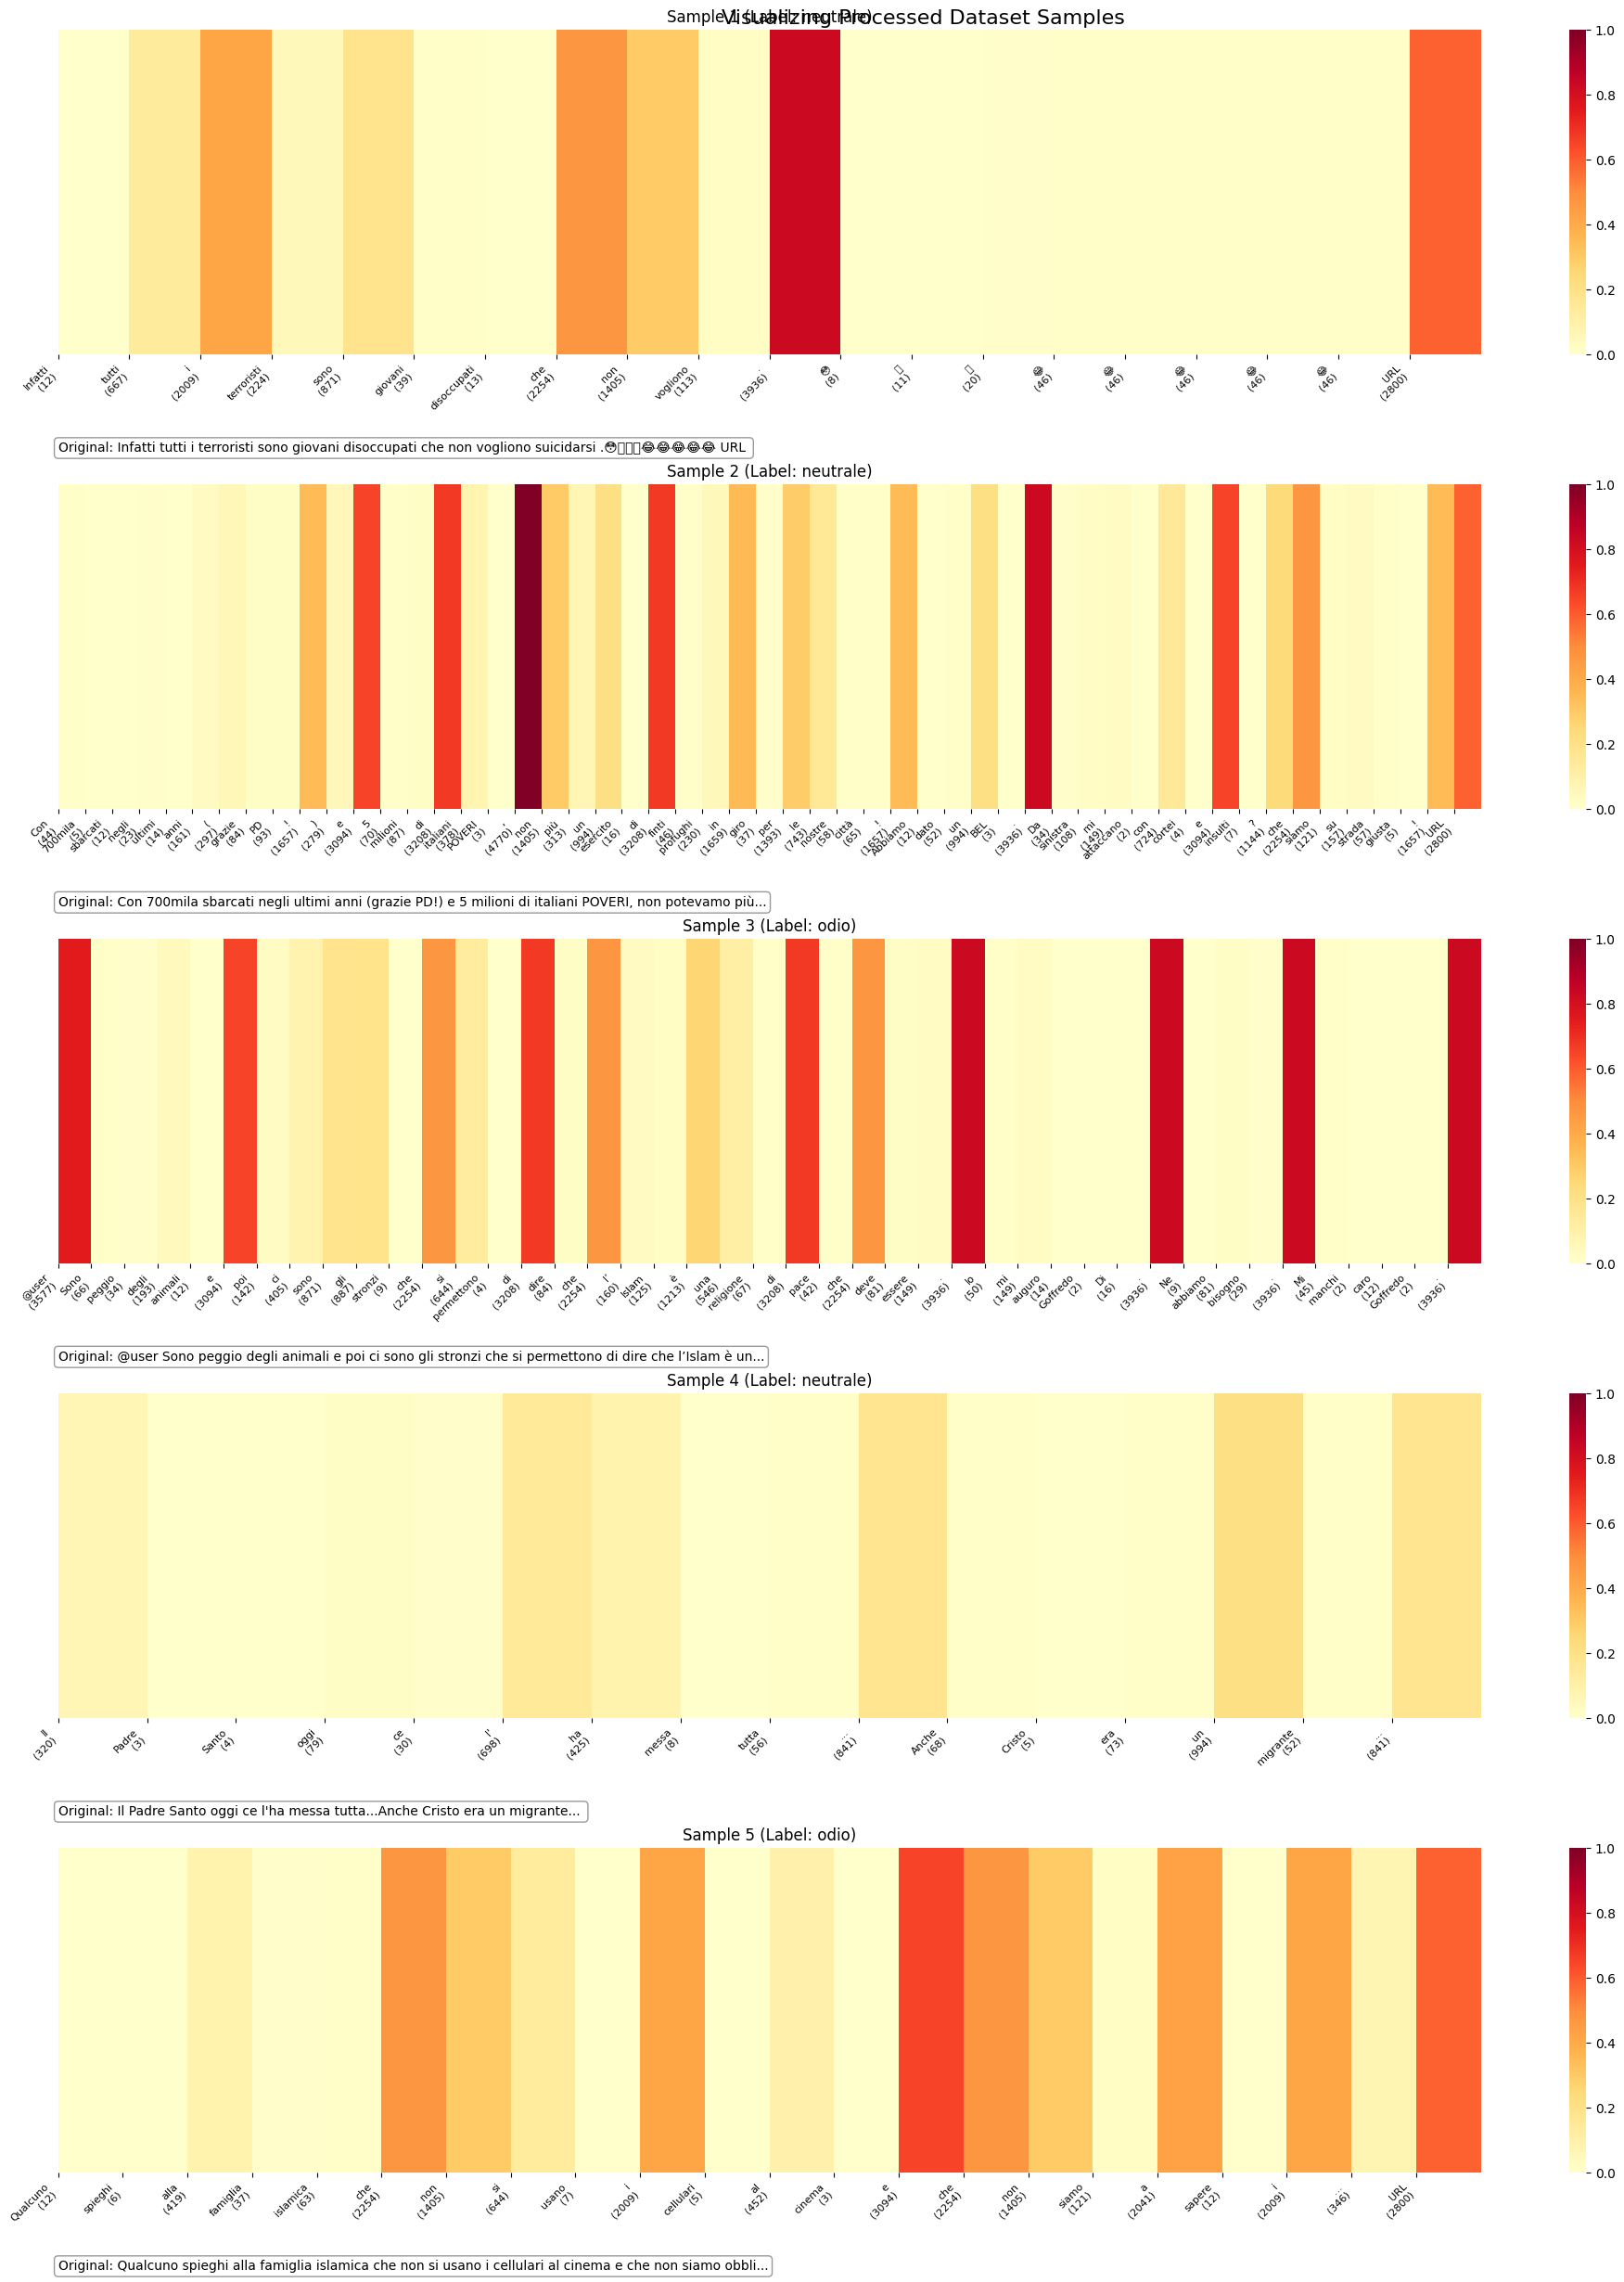

Vocabulary size: 8046
Number of samples: 5471
Max sequence length: 100
Label distribution:
  neutrale: 3260 (59.59%)
  odio: 2211 (40.41%)


In [ ]:
visualize_dataset(dataset, num_samples=5)

In [ ]:
dataset = LSTMTextClassificationDataset('/home/matteo/AI and Robotics/NLP/HM1b/HASPEEDE-20240708T122905Z-001/HASPEEDE/train-taskA.jsonl', split='train', split_ratio=1)

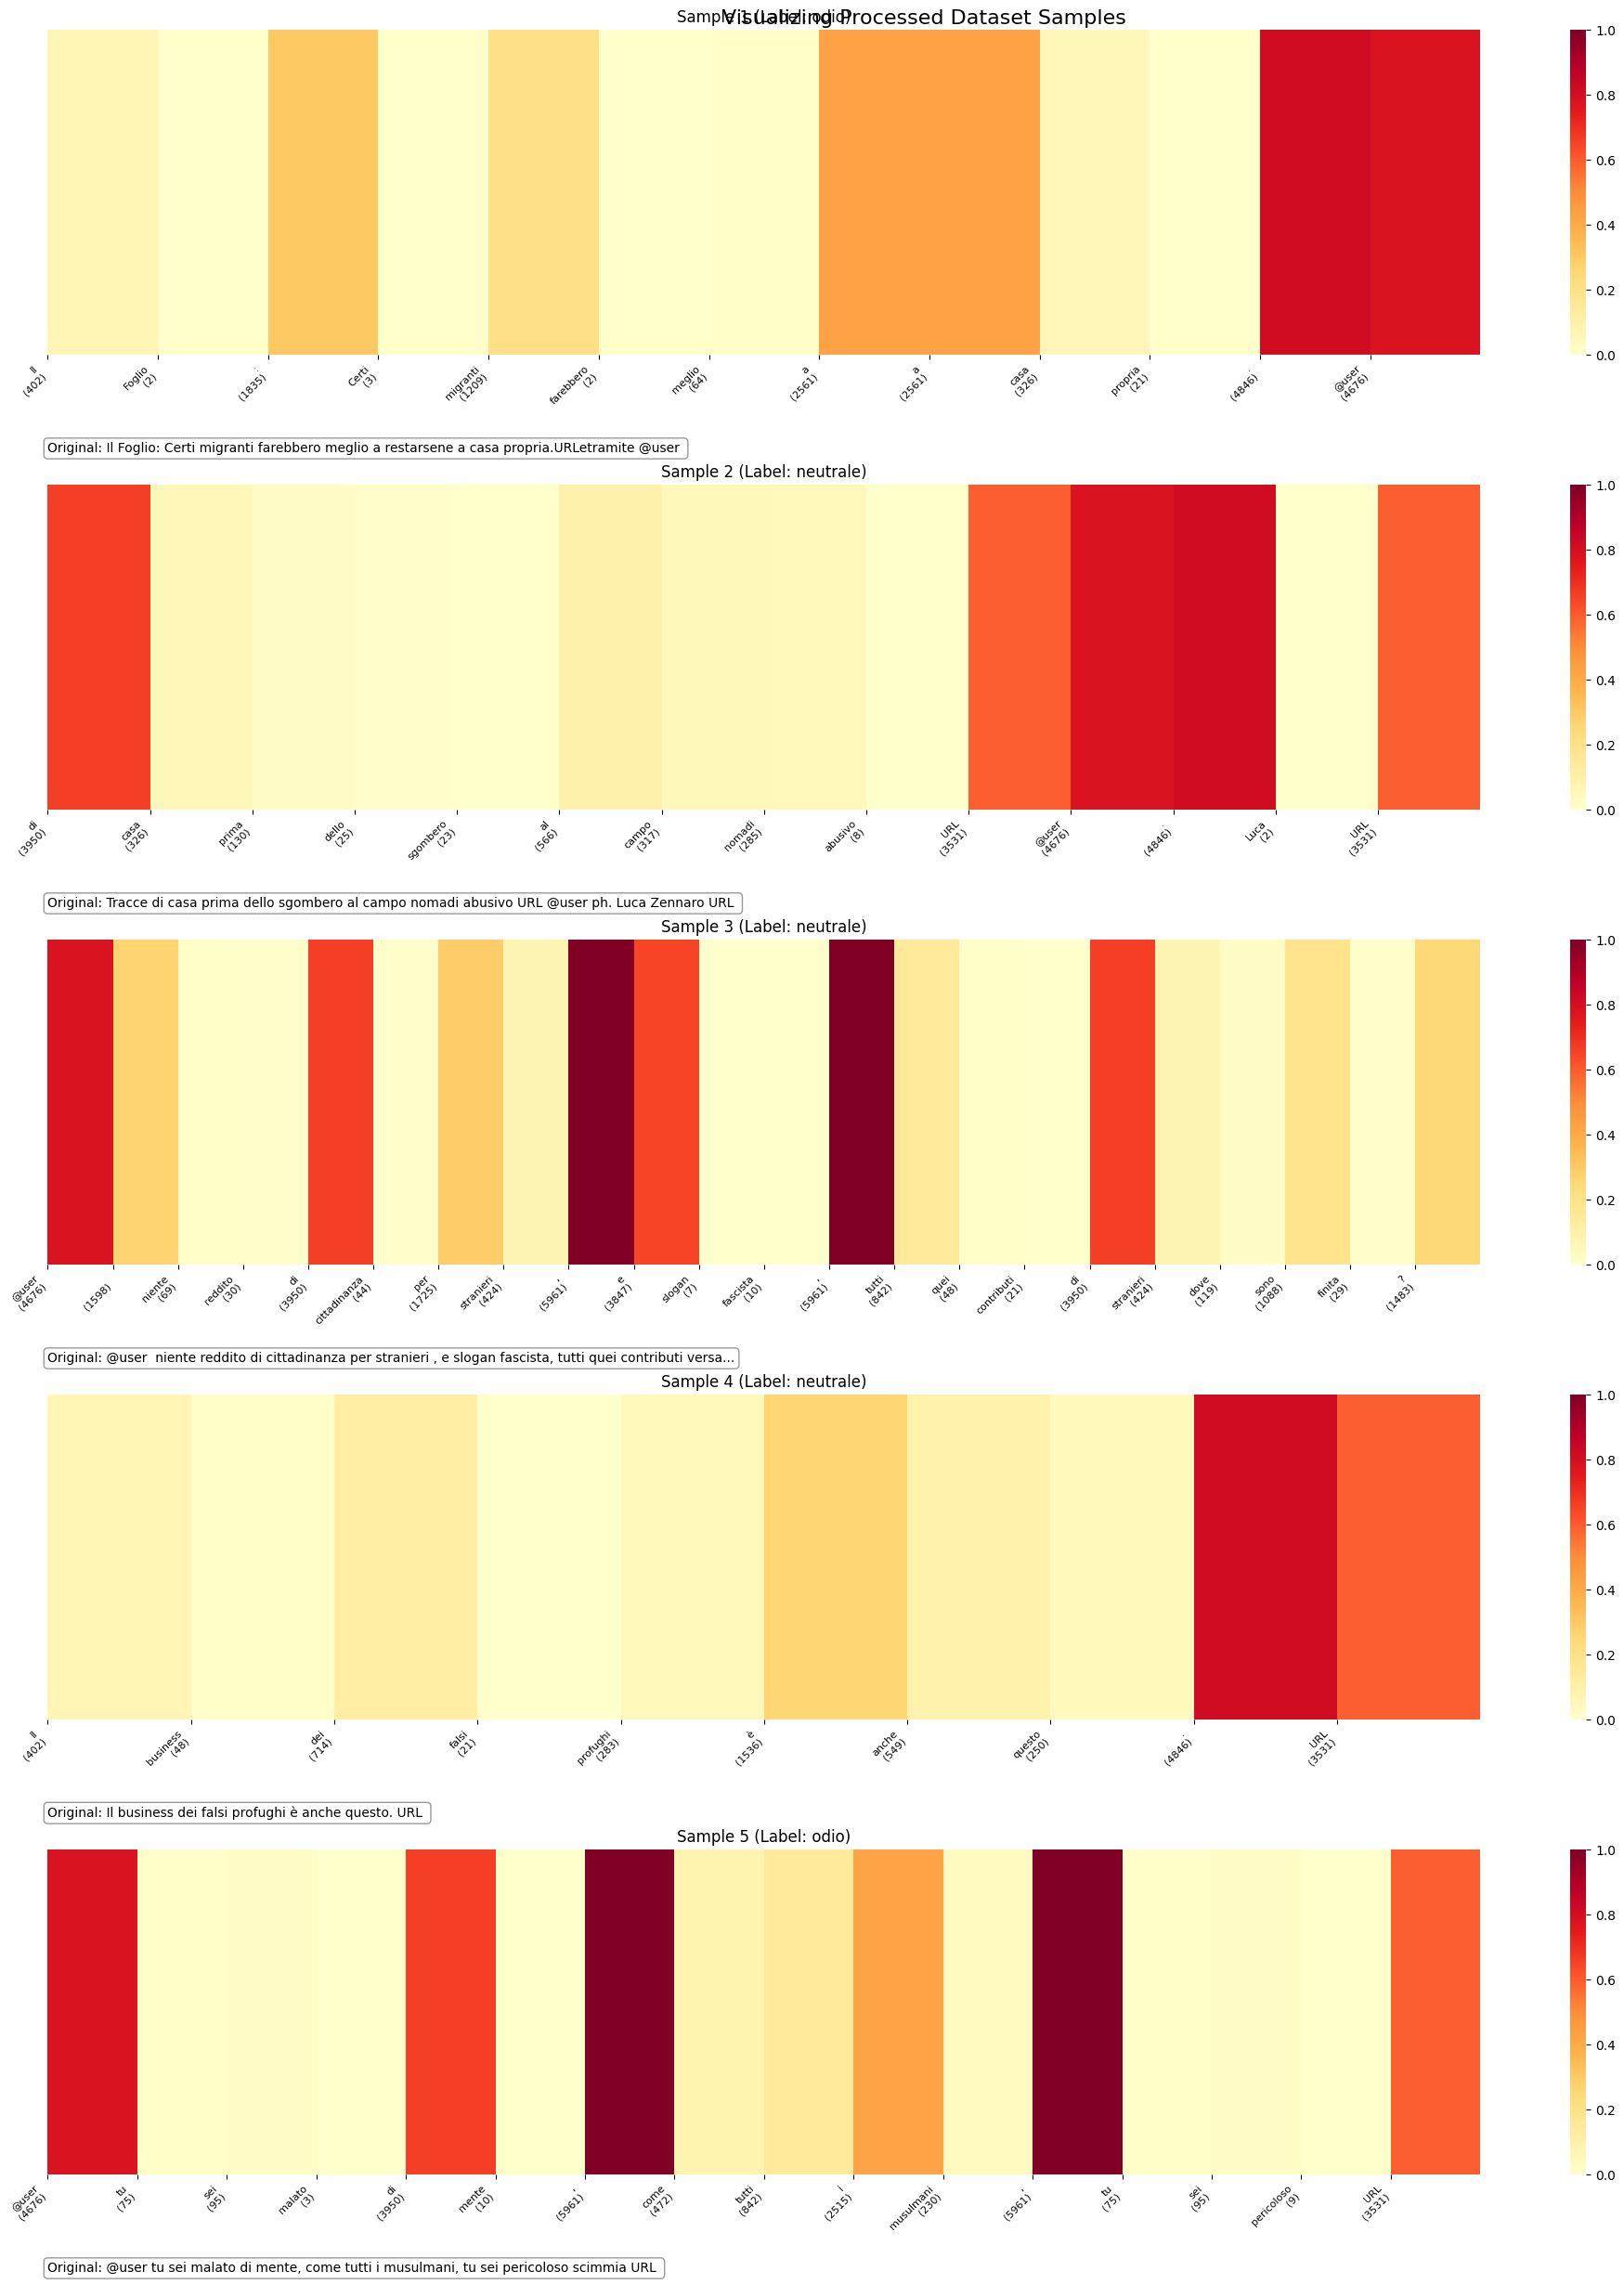

Vocabulary size: 9405
Number of samples: 6839
Max sequence length: 100
Label distribution:
  odio: 2766 (40.44%)
  neutrale: 4073 (59.56%)


In [ ]:
visualize_dataset(dataset, num_samples=5)

No kernel connected

In [ ]:
#%%

from lstm_dataset_class import LSTMTextClassificationDataset
import random
from torchtext.data.utils import get_tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

def visualize_dataset(dataset, num_samples=10):
    tokenizer = get_tokenizer("spacy", language="it_core_news_sm")
    
    fig, axes = plt.subplots(num_samples, 1, figsize=(20, 5*num_samples))
    fig.suptitle("Visualizing Processed Dataset Samples", fontsize=16)
    
    # Assuming 'unk_token_id' and 'pad_token_id' are the IDs for unk and pad tokens
    unk_token_id = dataset.vocab['<unk>']
    pad_token_id = dataset.vocab['<pad>']
    
    # Calculate token frequency for the entire dataset
    total_token_freq = Counter()
    for idx in range(len(dataset)):
        sample = dataset[idx]
        processed_ids = sample['input_ids'].tolist()
        filtered_ids = [id for id in processed_ids if id not in (unk_token_id, pad_token_id)]
        total_token_freq.update(filtered_ids)
    
    # Find the maximum frequency for normalization
    max_freq = max(total_token_freq.values())
    
    for i in range(num_samples):
        idx = random.randint(0, len(dataset) - 1)
        sample = dataset[idx]
        
        original_text = dataset.data[idx]['text']
        processed_ids = sample['input_ids'].tolist()
        label = dataset.data[idx]['choices'][sample['label'].item()]
        
        # Filter out unk and pad tokens
        filtered_ids = [id for id in processed_ids if id not in (unk_token_id, pad_token_id)]
        
        # Decode processed ids back to tokens
        processed_tokens = [dataset.vocab.get_itos()[id] for id in filtered_ids]
        
        # Get frequencies for this sample's tokens from the total dataset frequency
        freq_list = [total_token_freq[id] for id in filtered_ids]
        
        # Normalize frequencies
        normalized_freq_list = [freq / max_freq for freq in freq_list]
        
        # Visualize
        ax = axes[i]
        sns.heatmap([normalized_freq_list], ax=ax, cmap='YlOrRd', cbar=True, vmin=0, vmax=1)
        ax.set_yticks([])
        ax.set_xticks(range(len(processed_tokens)))
        
        # Add token labels with frequency counts
        token_labels = [f"{token}\n({freq})" for token, freq in zip(processed_tokens, freq_list)]
        ax.set_xticklabels(token_labels, rotation=45, ha='right', fontsize=8)
        
        ax.set_title(f"Sample {i+1} (Label: {label})")
        
        # Add original text as annotation
        ax.annotate(f"Original: {original_text[:100]}{'...' if len(original_text) > 100 else ''}",
                    xy=(0, -0.3), xycoords='axes fraction', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print(f"Vocabulary size: {dataset.get_vocab_size()}")
    print(f"Number of samples: {len(dataset)}")
    print(f"Max sequence length: {dataset.max_seq_length}")
    
    # Print label distribution
    label_dist = {}
    for item in dataset.data:
        label = item['choices'][item['label']]
        label_dist[label] = label_dist.get(label, 0) + 1
    print("Label distribution:")
    for label, count in label_dist.items():
        print(f"  {label}: {count} ({count/len(dataset)*100:.2f}%)")

# Usage:
# visualize_dataset(your_dataset_instance)

/home/matteo/AI and Robotics/NLP/HM1b/.venv/lib/python3.12/site-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/matteo/AI and Robotics/NLP/HM1b/.venv/lib/python3.12/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/matteo/AI and Robotics/NLP/HM1b/.venv/lib/python3.12/site-packages/torchtext/